In [148]:
#TODO: Figure out how to map motifs to scores so we know which motif is winning

In [1]:
#Dominic Giacoppe, CS project?????
#Attempt to make 
#key_motifs <- function(mydigraph, myseqs) {
#    lapply(myseqs, function(myseq) { lapply does y to x, assuming x is a list
#        outdeg_myseq <- sort(sapply(myseq, function(myvert) {sum(mydigraph[myvert, setdiff(myseq, myvert)])}))
#        indeg_myseq <- sort(sapply(myseq, function(myvert) {sum(mydigraph[setdiff(myseq, myvert), myvert])}))
#                       for all vertexes, get the out degree for each edge
#        c(indeg_myseq, outdeg_myseq)
#    })
#}
#into python
#so that it does 

In [52]:
import igraph
import random
import collections
import time
import numpy
import timeit
random.seed(119)

In [2]:
def exclusive_neighborhood(graph, v, Vp): #stolen from class
    assert type(graph)==igraph.Graph
    assert type(v)==int
    assert type(Vp)==set
    Nv = set(graph.neighborhood(v))
    NVpll = graph.neighborhood(list(Vp))
    NVp = set([u for sublist in NVpll for u in sublist])
    return Nv - NVp

In [3]:
def extend_subgraph(graph, Vsubgraph, Vextension, v, k, k_subgraphs): #same here
    assert type(graph)==igraph.Graph
    assert type(Vsubgraph)==set
    assert type(Vextension)==set
    assert type(v)==int
    assert type(k)==int
    assert type(k_subgraphs)==list
    if len(Vsubgraph) == k:
        k_subgraphs.append(Vsubgraph)
        assert 1==len(set(graph.subgraph(Vsubgraph).clusters(mode=igraph.WEAK).membership))
        return
    while len(Vextension) > 0:
        w = random.choice(tuple(Vextension))
        Vextension.remove(w)
        ## obtain the "exclusive neighborhood" Nexcl(w, vsubgraph)
        NexclwVsubgraph = exclusive_neighborhood(graph, w, Vsubgraph)
        VpExtension = Vextension | set([u for u in NexclwVsubgraph if u > v])
        extend_subgraph(graph, Vsubgraph | set([w]), VpExtension, v, k, k_subgraphs)
    return

In [47]:
def enumerate_subgraphs(graph, k): # also stolen from class
    assert type(graph)==igraph.Graph
    assert type(k)==int
    k_subgraphs = []
    for vertex_obj in graph.vs:
        v = vertex_obj.index
        Vextension = set([u for u in G.neighbors(v) if u > v])
        extend_subgraph(graph, set([v]), Vextension, v, k, k_subgraphs)
    return k_subgraphs

In [48]:
def keymotifs(seqs, graphy): #seqs is the sequences we want to do motif stuff on, graphy is the main graph
    inout = [[] for x in range(0,len(seqs))] #init the list of lists of in and out degrees
    inoutc = 0 #counter for iteration below
    for s in seqs:
        for i in s:
            inout[inoutc].append((sum(graphy[s.difference({i}), i]))) #in degree count
            inout[inoutc].append((sum(graphy[i, s.difference({i})]))) #out
        inout[inoutc] = sorted(inout[inoutc]) #sort list of degrees for analysis
        inoutc += 1
    return inout

In [49]:
def getkeymotifs(subsets, graph): #wrapper for keymotifs that also prints it for us
    mystuff = keymotifs(subsets, graph.as_directed())
    notes = [] #list of unique motif degree patterns
    score = [] #count for the above
    for k in range (0,len(mystuff)): #count unique motif patterns in the degree array
        if mystuff[k] not in notes:
            notes.append(mystuff[k])
            score.append(1)
        else:
            for x in range (0,len(notes)): #i wish i could do this in a cleaner way
                if notes[x] == mystuff[k]:
                    score[x] += 1
    return(score)
    #print(notes)

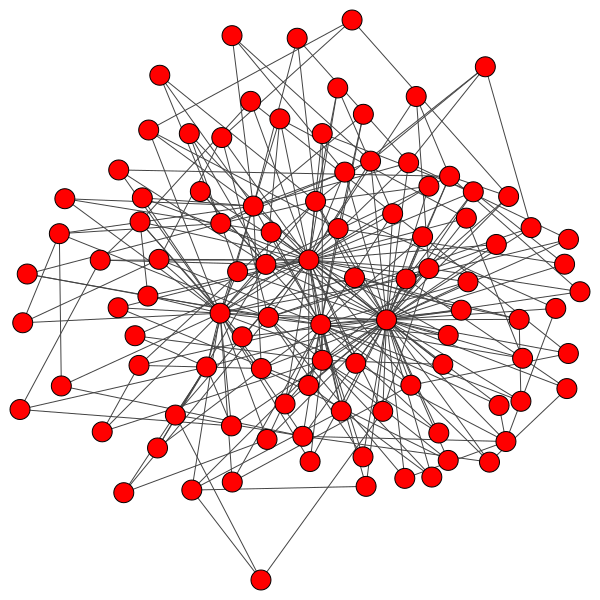

In [50]:
G = igraph.Graph.Barabasi(100, 3)
sgset = enumerate_subgraphs(G.as_directed(),4)
igraph.drawing.plot(G)

In [58]:
randtimes = []
mytimes = []
for x in range(100):
    start_time = timeit.default_timer()
    G.motifs_randesu(4)
    randtimes.append(timeit.default_timer() - start_time)
for x in range(100):
    start_time = timeit.default_timer()
    getkeymotifs(sgset, G)
    mytimes.append(timeit.default_timer() - start_time)


In [59]:
print(numpy.mean(randtimes))
print(numpy.mean(mytimes))
#jesus I'm slow

0.0316501068324
1.33314001774
